In [2]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Performance metrics

## Accuracy

This is perhaps the simplest classification metric and the easist to generalize to a multiclass setting the accuracy is simply given by

$$
\text{Accuracy} = \frac{\text{Number of correctly predicted samples}}{\text{Total number of samples}}.
$$

However, this metric, like any other, can be uninformative or even deceptive without proper context. For example if one has a highly unbalanced dataset where $99\%$ of samples belong to the negative class and only $1\%$ belong to the positive class, which can naturally arise in anomaly detection problems, then a classifier which simply predicts every sample belongs to the negative class will give a $99\%$ accuracy but is clearly useless.

## Precision

For a binary classifier the _precision_ is mathematical given by

$$

\text{Precision} = {\frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}}

$$

Intuitively we can think of precision as a metric that measures how often the classifier is correct _when it predicts a sample belongs to the positive class_. Put another way it answers the question: "Of all the samples the classifier said were positive, how many actually were?"

## Recall

For a binary classifier the _recall_ is mathematical given by

$$

\text{Recall} = {\frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}}

$$

Intuitively we can think of recall as a metric that measures how good the classifier is at finding _all_ the actual positive examples. Put another way it answers the question: "Of all the samples that _are actually positive_, how many did the classifier correctly identify as positive?"

## $F_1$ score

The $F_1$ score is the harmonic mean, where the harmonic mean $\bar{x}_H$ of $n$ real numbers, $x_1,x_2,...,x_n$ is given by

$$
\bar{x}_H = \frac{n}{x_1^{-1} + x_2^{-1} + \cdots + x_n^{-1}},
$$

 of precision and recall and is given by

$$
F_1 = 2\left( \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} \right)= \frac{2\times\text{TP}}{2\times \text{TP} + \text{FP} + \text{FN}}
$$

## Area under curve (AUC)

The area under the curve, where the curve refers to the receiver operating characteristic (ROC) curve, is a popular performance metric for, usually binary also multiclass, classification models. The ROC curves plots the true positive rate versus the false positive rate at all possible values of the model's probability threshold for prediction. For example for a logistic regression model if the model's threshold is $0.7$ then the model will predict an input belongs to the default (negative class) of the two possible classes if the output probability from the model exceeds $0.7$ i.e. if $P(Y=\text{negative}|X=x) > 0.7$ for an input, $x$, to the model.

The area under this curve (AUC) gives a summary of the model's performance at all possible threshold values and ranges from $[0,1]$ with $1$ indicating a perfect classifier on the test set. The AUC of a model that simply assigns labels uniformly at random would be $0.5$ and the ROC curve would simply be a straight line. Naturally a model with an ROC curve which hugs the top left corner of the plot is better. 

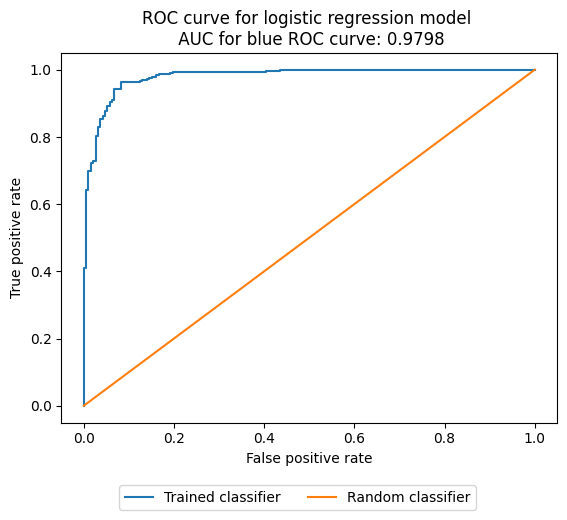

In [18]:
data = load_breast_cancer()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


class_scores = model.predict_proba(X_test)  # get class probabilities from model
positive_label_scores = class_scores[:, 1]  # get probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_test, positive_label_scores, pos_label=1)
auc_score = roc_auc_score(y_test, positive_label_scores)


plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title(f"ROC curve for logistic regression model \n AUC for blue ROC curve: {auc_score:.4}")
plt.plot(fpr, tpr, label="Trained classifier")
plt.plot(np.linspace(0.0,1.0), np.linspace(0.0,1.0), label="Random classifier")
plt.legend(fancybox=True, ncols=2, bbox_to_anchor=(.85, -0.15));

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Sat Apr 12 2025

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

matplotlib: 3.7.4
numpy     : 1.26.2

